<a href="https://colab.research.google.com/github/matteoalberti/Lectures_AdvCV_Experis2020/blob/main/extra/AdvanceML_ExpAcademy_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://github.com/matteoalberti/Lectures_AdvCV_Experis2020/blob/main/extra/images/intro.jpg?raw=1)

Contacts :

   Linkedin:
   [linkedin_matteo_alberti](www.linkedin.com/in/matteo-alberti-17041993)

    Notes:
    
    - AE
    - VARIANTS

# Introduction

## Autoencoder Overview



Autoencoders are unsupervised neural networks that aim to copy their inputs to their outputs. They work by compressing the input into a **latent-space representation**, and then reconstructing the output from this representation. 


![](https://miro.medium.com/max/600/1*nqzWupxC60iAH2dYrFT78Q.png)

- The **latent vector** is the essence of the autoencoder;

- The encoder and the decoder could be composed by any kind of layers. We will se a CNN-autoencoder;

**Encoder:** This is the part of the network that compresses the input into a latent-space representation. It can be represented by an encoding function 

### $$h=f(x).$$

**Decoder**: This part aims to reconstruct the input from the latent space representation. It can be represented by a decoding function 

### $$r=g(h).$$


The autoencoder as a whole can thus be described by the function 

### $$g(f(x)) = r.$$ 

where $r$ is called *reconstruction*. By training the autoencoder to copy the input to the output ($r$ as close as the original input $x$), the latent representation $h$ will take on useful properties. For instance, if the dimension of $h$ is smaller than $x$ we can construct a representation of the input which is compressed. This forces the autoencoder to learn the most salient features of the training data (a sort of PCA).

References:
- [Gradient-based learning applied to document recognition](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf). Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. Proceedings of the IEEE, 86(11):2278-2324, November 1998.

## Applications of Autoencoders

- **Dimensional Reduction**: throw away the output and extract the compressed layer. We can now build a new dataset with lower dimensionality;
- **Seq2Seq**: Sequence to Sequence models (language translation, for instance) have an encoder-decoder structure;
- **Time-Series-Forecasting** : Dimensionality reduction tool working with other models (LSTM | GRU )
- **Denoising**: the input is an image with some noise added. The loss function is setted to minimize the difference between the reconstructed image and the original noise-free image.
- **...**


    How we want to proceed?
    
    - A Bit of Mathematics
    - Understand Base Autoencoder in different scenarios
    - Achieve the State-of-the-Art

# A Bit of Mathematics

## <h1><center>  Information Theory Background 

*(thanks Cristiano for the example!)*


### Self-Information

The idea behind self-information is the following

* if an event always occurs, we associate it with a smaller amount of information. It will not suprise us!
* On the other side, a rare event is associated with a huge amount of information. It will suprise us!

I am not surprise to see the sunrise every morning (likely event). Instead,  I would be really suprised if tomorriw the Sun will not rise (unlikely event). This amount of surprise or self-information of the event $x$ is quantified by

$$I(x) = - \log p(x),$$

where $p(x)$ is the probability of the event $x$. If $p(x)=1$, then self-info is zero. A rare event instead has a huge surpise factor.

### Shannon Entropy 

In terms of self-info, Shannon Entropy is the is the average self-information (expected value) over all possible values of X.
The entropy for a probability $p(x)$ distribution is

$$ S = - \sum_i p(x_i) \log p(x_i),$$

where we assume we know the probability $p$ for each outcome $i$. If we use $log_2$  for our calculation we can interpret entropy as *the minimum number of bits it would take us to encode our information*.

For continous variables, we can use the integral form

$$ S = - \int  p(x) \log p(x) \, dx,$$

where now $p(x)$ is take the role of a probability density function (PDF). Take in mind that a broad probability density has higher entropy than an narrowed one (think about Gaussian distribution vs delta Dirac, which has $S=0$).

In both discrete and continous formulation, we are computing the expectation (i.e. average) of the negative log-probability (i.e. self-info) which is the theoretical minimum encoding size of the information from the event $x$. The same formula is usually written as

$$S = \mathbb E _{\, x \sim p} \left[ -\log p(x) \right],$$

where $x \sim p$ means that we calculate the expectation with the probability distribution $p$.

Let's say we have to pass a message about what drink Cristiano would take during an event. In general, Cristiano loves [Midori Sour](https://drizly.com/midori-sour/r-b972d5282bec6fe8) , Daiquiri, Spritz and Wine.

On Monday, Cristiano loves to listen Jazz and the probability distribution of his choice is: 

$$P(\text Midori ) =  P(\text Daiquiri ) = P(\text Spritz ) = P(\text Wine ) = 0.25,$$

while the corresponding entropy

$$S = - \frac{1}{4} \log \frac{1}{4} - \frac{1}{4} \log \frac{1}{4} - \frac{1}{4} \log \frac{1}{4} - \frac{1}{4} \log \frac{1}{4} = 2$$

On Wednesday, he usually meets with some friends after work: 

$$P(\text Midori ) = 0.125,\;  P(\text Daiquiri ) =0.125,\;  P(\text Spritz ) = 0.5,\; P(\text  Wine ) = 0.25,$$

while the corresponding entropy

$$S = - \frac{1}{8} \log \frac{1}{8} - \frac{1}{8} \log \frac{1}{8} - \frac{1}{2} \log \frac{1}{2} - \frac{1}{4} \log \frac{1}{4} = 1.75$$


On Thursday, he often goes to an event where cocktail attire dress code is required

$$P(\text Midori ) = 0.95,\;  P(\text Daiquiri ) =0.02,\;  P(\text Spritz ) = 0.018,\; P(\text  Wine ) = 0.012,$$

and the corresponding entropy

$$S = - 0.95 \log 0.95 - 0.02 \log 0.02 - 0.018 \log 0.018 - 0.012 \log 0.012 = 0.364$$

In [ ]:
import math as m
# On Monday, all drinks have equal probability to be chose
entropy_1 = -0.25*m.log(0.25,2)-0.25*m.log(0.25,2)-0.25*m.log(0.25,2)-0.25*m.log(0.25,2)
print('On Monday, high entropy: ', entropy_1)

# On Wednesday, some are more probable than others
entropy_2 = -0.5*m.log(0.5,2)-0.25*m.log(0.25,2)-0.125*m.log(0.125,2)-0.125*m.log(0.125,2)
print('On Wednesday, medium entropy: ', entropy_2)

# On Thursday, one drink is by far the most probable
entropy_3 = -0.95*m.log(0.95,2)-0.02*m.log(0.02,2)-0.018*m.log(0.018,2)-0.012*m.log(0.012,2)
print('On Thursday, low entropy: ', entropy_3)

On Monday, high entropy:  2.0
On Wednesday, medium entropy:  1.75
On Thursday, low entropy:  0.36407300467232967


If entropy is high (encoding size $log_2 p(x)$ is big on average), it means we have many message types with small and almost equal probabilities. Hence, every time a new message arrives, you would expect a different type than previous messages. You may see it as a disorder or uncertainty or unpredictability.

On the contrary, when a message has much smaller probability than other message, it appears as a surprise because on average you would expect other more frequently sent message types. Also, a rare message type has more information than more frequent message types because it eliminates a lot of other probabilities and tells us more specific information.

In the drink scenario, by sending “Wine” on thursday which happens 1.2% of the times, we are reducing the uncertainty by 98.8% of the probability distribution (“Midori, Daiquiri, Spritz”) provided we had no information before. If we were sending “Midori” (95%) instead, we would be reducing the uncertainty by 5% only.

If the entropy is high, the average encoding size is significant which means each message tends to have more (specific) information. Again, this is why high entropy is associated with disorder, uncertainty, surprise, unpredictability, amount of information. The more random a message is, the more information will be gained from decoding the message.

Low entropy means that most of the times we are receiving the more predictable information which means less disorder, less uncertainty, less surprise, more predictability and less (specific) information. This is the Thursday case.

### Cross Entropy

Suppose to have two distributions, the true one $p(x)$ and the estimated $q(x)$. In the language of neural networks, $p(x)$ would be the grond truth (labels in one hot-encoding) and $q(x)$ the outcome of the net, i.e. the one that your machine learning algorithm is trying to match. Cross entropy is a mathematical tool for comparing two probability distributions $p(x)$ and $q(x)$ and it is expressed by the formula 

$$ H (p,q) = - \int p(x) \log q(x)\,dx.$$

If $\log$ is in base $2$, then cross entropy measures the number of bits you will need encoding symbols from $p$ using the wrong distribution $q$. Subtracting to cross entropy the entropy of $p$, you are counting the cost in terms of bits of using the wrong distribution $q$ (this somehow will be KL-divergence). 

### Kullback-Leibler Divergence

KL-divergence is just a slight modification of our formula for entropy. Rather than just having our probability distribution $h$ we add in our approximating distribution $g$. Then we look at the difference of the log values for each

$$D_{KL}(h || g) = - \sum_i h(x_i) (\log h(x) - \log g(x)) = - \sum_i h(x_i) \log \frac{h(x)}{g(x)}$$ 

KL-divergence is the expectation of the log-difference between the probability of data in the original distribution $h$ with the approximating distribution $g$. Again, if we think in terms of $\log_2$ we can interpret this as how many bits of information we expect to lose when we choose an approximation $g$ of our original ditribution $h$. 

In the variational autoencoder loss function, the KL-divergence is used to force the distribution of latent variables $q(z | x)$ to be a normal distribution $n(z)$ so that we can sample latent variables from the normal distribution. As such, the KL-divergence is included in the loss function to improve the similarity between the distribution of latent variables and the normal distribution. More about **KL** can be found [here](https://towardsdatascience.com/demystifying-kl-divergence-7ebe4317ee68) and about **cross-entropy** [here](https://towardsdatascience.com/demystifying-cross-entropy-e80e3ad54a8).

# Understand Base Autoencoder in different scenarios

##  [Computer Vision - Image Recontruction]

In [ ]:
 ### Load Data ### 

## Cifar10 Dataset Overview

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

![Cifar10 Dataset](https://github.com/matteoalberti/Lectures_AdvCV_Experis2020/blob/main/extra/images/Cifar10.png?raw=1)

More info: https://www.cs.toronto.edu/~kriz/cifar.html

## Deconvolutional Layer (transposed conv-layer)

A deconvolutional layer is just the transposed of its corresponding convolutional layer (E.g. if conv layer's shape is [height, width, numColors, numMaps], than the deconv layer will have the shape [height, width, numMaps, numColors])

one-to-many (deconv; feature to pixels) rather than many-to-one (conv; pixels to feature) association.

### Math of Convolution

![](https://upload.wikimedia.org/wikipedia/commons/0/04/Convolution_arithmetic_-_Padding_strides.gif)


### Math of Transposed Convolution


![](https://cdn-images-1.medium.com/max/1000/1*uk4KJEtyDuPOipfG4yd-WA.gif)
![](https://miro.medium.com/max/1904/1*faRskFzI7GtvNCLNeCN8cg.png)


#### Start coding!

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt

#### Load Data

In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

#The range for each individual colour is 0-255
x_train = x_train.astype('float32')/255 
x_test = x_test.astype('float32')/255


def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def display_stats(batch_id, sample_id):
    features, labels = x_train, y_train
    
    if not (0 <= sample_id < len(features)):
        print('{} samples in batch {}.  {} is out of range.'.format(len(features), batch_id, sample_id))
        return None

    print('\nStats of batch #{}:'.format(batch_id))
    print('# of Samples: {}\n'.format(len(features)))
    
    label_names = load_label_names()
    label_counts = dict(zip(*np.unique(labels, return_counts=True)))
    for key, value in label_counts.items():
        print('Label Counts of [{}]({}) : {}'.format(key, label_names[key].upper(), value))
    
    sample_image = features[0]
    sample_label = labels[0]
    
    print('\nExample of Image {}:'.format(sample_id))
    print('Image - Min Value: {} Max Value: {}'.format(sample_image.min(), sample_image.max()))
    print('Image - Shape: {}'.format(sample_image.shape))
    #print('Label - Label Id: {} Name: {}'.format(sample_label, label_names[sample_label]))
    
    plt.imshow(sample_image)
    return features, labels

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

def plot_model_history_ae(model_history):
    fig, axs = plt.subplots(1,1,figsize=(8,5))
    # summarize history for loss
    axs.plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs.plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs.set_title('Model Loss')
    axs.set_ylabel('Loss')
    axs.set_xlabel('Epoch')
    axs.set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs.legend(['train', 'val'], loc='best')
    plt.show()
    
def showOrigDec(orig, dec, num=10):
    import matplotlib.pyplot as plt
    n = num
    plt.figure(figsize=(20, 4))

    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i+1)
        plt.imshow(orig[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i +1 + n)
        plt.imshow(dec[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

def showOrigDec2(orig, noise, denoise, num=10):
    import matplotlib.pyplot as plt
    n = num
    plt.figure(figsize=(20, 4))

    for i in range(n):
        # display original
        ax = plt.subplot(3, n, i+1)
        plt.imshow(orig[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display noisy image
        ax = plt.subplot(3, n, i +1 + n)
        plt.imshow(noise[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # display denoised image
        ax = plt.subplot(3, n, i +1 + n + n)
        plt.imshow(denoise[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


##### Visualize Dataset


Stats of batch #1:
# of Samples: 50000

Label Counts of [0](AIRPLANE) : 5000
Label Counts of [1](AUTOMOBILE) : 5000
Label Counts of [2](BIRD) : 5000
Label Counts of [3](CAT) : 5000
Label Counts of [4](DEER) : 5000
Label Counts of [5](DOG) : 5000
Label Counts of [6](FROG) : 5000
Label Counts of [7](HORSE) : 5000
Label Counts of [8](SHIP) : 5000
Label Counts of [9](TRUCK) : 5000

Example of Image 1:
Image - Min Value: 0.0 Max Value: 1.0
Image - Shape: (32, 32, 3)


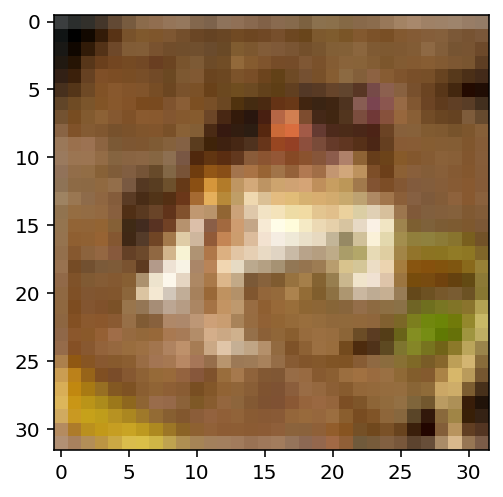

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Explore the dataset
features, labels = display_stats(batch_id=1, sample_id=1)

### Start with some best practices!

In [11]:
#Parameters
import sys;import argparse; sys.argv=['']; del sys
parser = argparse.ArgumentParser(description="AE")
parser.add_argument('--epochs', default=100, type=int)
parser.add_argument('--batch_size', default=32, type=int)
parser.add_argument('--lr', default=0.001, type=float)
parser.add_argument('--classes', default=10, type=int)

parser.add_argument('--height', default=32, type=int)
parser.add_argument('--width', default=32, type=int)
parser.add_argument('--channel', default=3, type=int)

parser.add_argument('--train', default=False)
args_ae = parser.parse_args()
print(args_ae)

Namespace(batch_size=32, channel=3, classes=10, epochs=100, height=32, lr=0.001, train=False, width=32)


### Model Architecture [AE]

In [13]:
def AE(height,width,channel, summ = True): 
    input_img = tf.keras.Input(shape=(height, width, channel))
    x = tf.keras.layers.Conv2D(64, (3, 3), padding='same')(input_img)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
    x = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
    x = tf.keras.layers.Conv2D(16, (3, 3), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

    x = tf.keras.layers.Conv2D(16, (3, 3), padding='same')(encoded)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.UpSampling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.UpSampling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.UpSampling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(3, (3, 3), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    decoded = tf.keras.layers.Activation('sigmoid')(x)

    model = tf.keras.Model(input_img, decoded)
    model.compile(optimizer='adam', loss='binary_crossentropy')
    if summ == True:
        model.summary()
    return model

In [15]:
Autoencoder = AE(height=args_ae.height, width=args_ae.width, channel=args_ae.channel, summ=True)

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
batch_normalization_8 (Batch (None, 16, 16, 32)       

### Train [AE]

In [16]:
! mkdir pretrained_model

In [ ]:
# load pretrained weights
if args_ae.train==True:
    history_ae = Autoencoder.load_weights('./pretrained_model/AE.hdf5')
else:
    try:
        Autoencoder.load_weights('./pretrained_model/AE.hdf5') #reload weights and continue training
    except OSError:
        pass
    es_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='auto')
    chkpt = './pretrained_model/AE.{epoch:02d}-{loss:.2f}-{val_loss:.2f}.hdf5'
    cp_cb = tf.keras.callbacks.ModelCheckpoint(filepath = chkpt, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
    #Train
    history_ae = Autoencoder.fit(x_train, x_train,
                    batch_size=128,
                    epochs=30,
                    verbose=1,
                    validation_split=0.2,
                    callbacks=[es_cb, cp_cb],
                    shuffle=True)

Epoch 1/30
313/313 [==============================] - ETA: 0s - loss: 0.5851
Epoch 00001: val_loss improved from inf to 0.59480, saving model to ./pretrained_model/AE.01-0.59-0.59.hdf5
313/313 [==============================] - 300s 957ms/step - loss: 0.5851 - val_loss: 0.5948
Epoch 2/30
313/313 [==============================] - ETA: 0s - loss: 0.5771
Epoch 00002: val_loss improved from 0.59480 to 0.57827, saving model to ./pretrained_model/AE.02-0.58-0.58.hdf5
313/313 [==============================] - 302s 964ms/step - loss: 0.5771 - val_loss: 0.5783
Epoch 3/30
313/313 [==============================] - ETA: 0s - loss: 0.5739
Epoch 00003: val_loss improved from 0.57827 to 0.57458, saving model to ./pretrained_model/AE.03-0.57-0.57.hdf5
313/313 [==============================] - 300s 957ms/step - loss: 0.5739 - val_loss: 0.5746
Epoch 4/30
313/313 [==============================] - ETA: 0s - loss: 0.5717
Epoch 00004: val_loss improved from 0.57458 to 0.57302, saving model to ./pretrai

### Save Model!

In [ ]:
Autoencoder.save_weights('./pretrained_model/AE10_2.h5')

In [ ]:
! ls ./pretrained_model

### Evaluate Training & Prediction

In [ ]:
plot_model_history_ae(history_ae)

In [ ]:
score = Autoencoder.evaluate(x_test, x_test, verbose=1)

In [ ]:
print(score)

In [ ]:
c10test = Autoencoder.predict(x_test)
c10val = Autoencoder.predict(x_val)

In [ ]:
print("Cifar10_test: {0}\nCifar10_val: {1}".format(np.average(c10test), np.average(c10val)))

Cifar10_test: 0.4745425581932068
Cifar10_val: 0.9998482465744019


In [ ]:
showOrigDec(x_test, c10test)

    Questions:
    
        - What is the difference between RGB / BN in terms of parameters?
        - How much the accuracy improve / decrease?
        - Which are other possible tools to increace the accuracy of our model?

##  [Computer Vision - Image Denoising]

In [ ]:
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 


x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


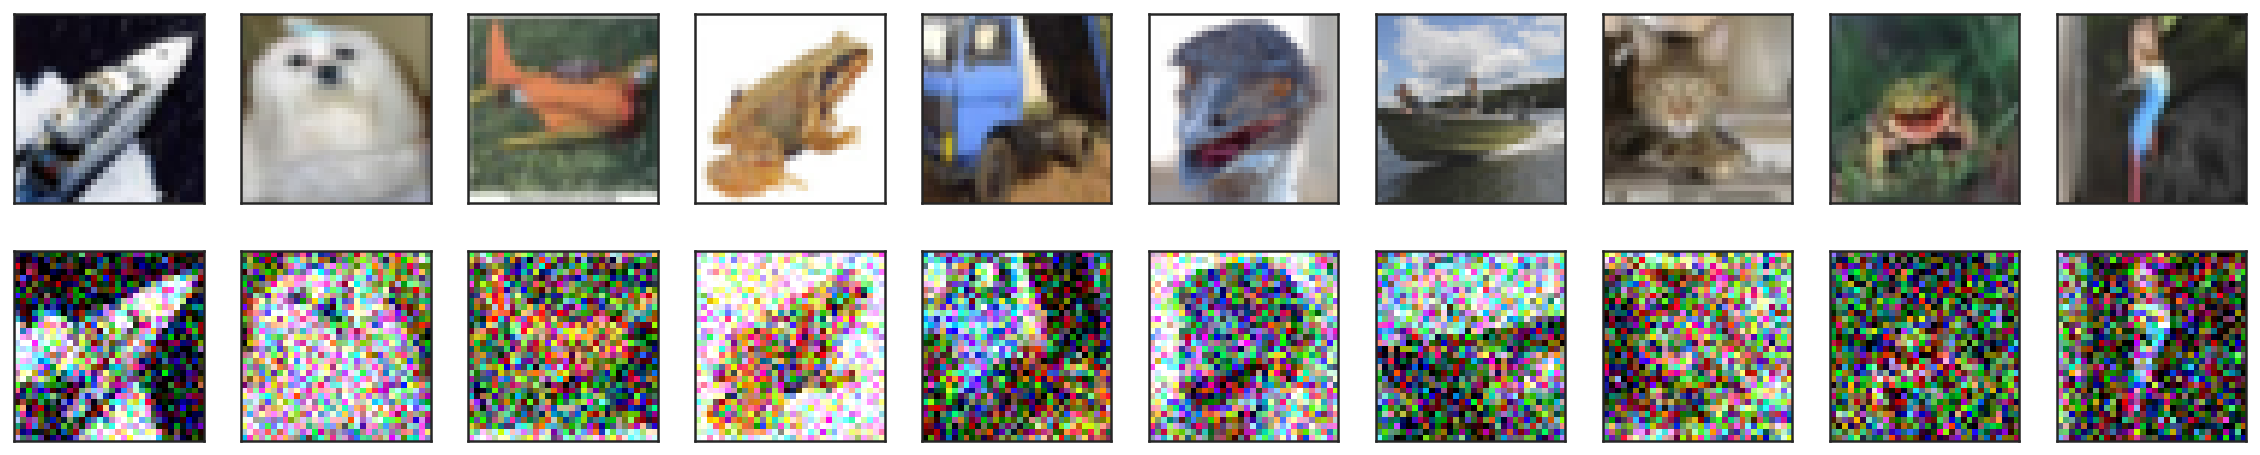

In [ ]:
showOrigDec(x_train, x_train_noisy)

#### Evaluate on original versus noisy data

In [ ]:
score = Autoencoder.evaluate(x_test_noisy, x_test, verbose=1)

1000/1000 [==============================] - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 13s    


In [ ]:
print(score)

0.5791532773971557


In [ ]:
c10test = Autoencoder.predict(x_test_noisy)
c10val = Autoencoder.predict(x_val_noisy)

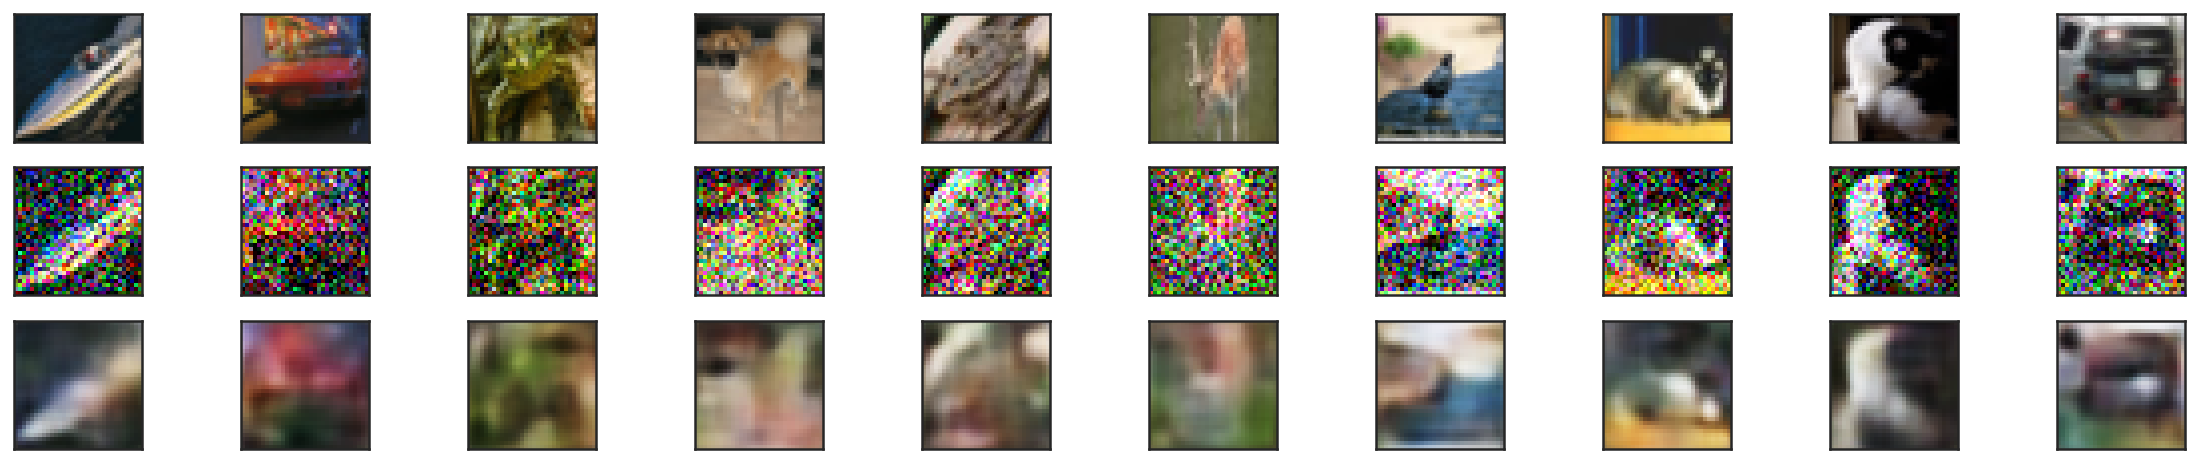

In [ ]:
showOrigDec2(x_test, x_test_noisy, c10test)

   ### Math VAE

   https://tiao.io/post/tutorial-on-variational-autoencoders-with-a-concise-keras-implementation/